In [136]:
import tensorflow as tf 
import numpy as np
import pandas as pd
np.set_printoptions(precision=3, suppress=True)
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from yahoo_fin import stock_info as yf
import yahoo_fin.stock_info as si

In [64]:
aapl = yf.get_stats_valuation("aapl")
cols = aapl.columns
print(cols)
val = aapl.iloc[:,:6]
val.columns = ["Attribute", "Current", cols[2],cols[3],cols[4],cols[5]] 
print(val)
PE_S = [[float(val[val.Attribute.str.contains("Trailing P/E")].iloc[0,i]),cols[i]] for i in range(1,6)]
PS_S = [[float(val[val.Attribute.str.contains("Price/Sales")].iloc[0,i]),cols[i]] for i in range(1,6)]
PB_S = [[float(val[val.Attribute.str.contains("Price/Book")].iloc[0,i]),cols[i]] for i in range(1,6)]
print(PE_S)

Index(['Unnamed: 0', 'As of Date: 1/3/2024Current', '9/30/2023', '6/30/2023',
       '3/31/2023', '12/31/2022'],
      dtype='object')
                   Attribute Current 9/30/2023 6/30/2023 3/31/2023 12/31/2022
0      Market Cap (intraday)   2.89T     2.68T     3.05T     2.61T      2.07T
1           Enterprise Value   2.94T     2.72T     3.10T     2.67T      2.14T
2               Trailing P/E   30.28     28.73     32.88     28.00      21.27
3                Forward P/E   28.17     25.77     29.41     27.86      21.28
4  PEG Ratio (5 yr expected)    2.23      2.18      2.66      2.79       2.53
5          Price/Sales (ttm)    7.66      7.10      8.08      6.89       5.38
6           Price/Book (mrq)   46.46     44.41     49.08     45.99      40.62
7   Enterprise Value/Revenue    7.66     30.43     37.96     28.14      18.26
8    Enterprise Value/EBITDA   22.73     91.94    119.18     85.49      54.93
[[30.28, 'As of Date: 1/3/2024Current'], [28.73, '9/30/2023'], [32.88, '6/30/2023'], 

C:\Users\xlor1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\yahoo_fin\stock_info.py:357: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(requests.get(stats_site, headers=headers).text)


In [209]:
aapl_train = pd.read_csv("C:\\Users\\xlor1\\Downloads\\dataset_test.csv",
                         names=["Date","Stock Price","TTM Net EPS","PE Ratio","Price to Sales Ratio","Price to Book"])


aapl_test = pd.read_csv("C:\\Users\\xlor1\\Downloads\\dataset_testa.csv",
                         names=["Date","Stock Price","TTM Net EPS","PE Ratio","Price to Sales Ratio","Price to Book"])
aapl_train["Date"] = pd.to_datetime(aapl_train["Date"])
aapl_train = aapl_train.set_index("Date")
aapl_test["Date"] = pd.to_datetime(aapl_test["Date"])
aapl_test = aapl_test.set_index("Date")
aapl_train.tail()

,Stock Price,TTM Net EPS,PE Ratio,Price to Sales Ratio,Price to Book
Date,,,,,
2010-12-31,9.76,0.64,15.27,3.33,4.61
2010-09-30,8.59,0.54,15.87,3.41,4.61
2010-06-30,7.61,0.44,17.29,3.44,4.52
2010-03-31,7.11,0.36,19.59,3.57,4.60
2009-12-31,6.38,0.31,20.62,3.48,4.53


In [210]:


aapl_features = aapl_train.copy()
aapl_labels = aapl_features.pop('Stock Price')

x_test = aapl_test.copy()
y_test = aapl_test.pop('Stock Price')
x_test = np.array(x_test,dtype=float)

aapl_features = np.array(aapl_features,dtype=float)

aapl_features = (aapl_features-np.min(aapl_features))/(np.max(aapl_features)-np.min(aapl_features))
print(aapl_features)


[[0.104 0.795 0.157 0.27 ]
 [0.098 0.762 0.149 0.258]
 [0.093 0.741 0.143 0.245]
 [0.09  0.758 0.146 0.241]
 [0.088 0.62  0.117 0.195]
 [0.087 0.608 0.117 0.199]
 [0.09  0.491 0.095 0.169]
 [0.096 0.531 0.107 0.191]
 [0.101 0.485 0.1   0.189]
 [0.098 0.518 0.107 0.214]
 [0.092 0.628 0.131 0.238]
 [0.084 0.665 0.139 0.23 ]
 [0.076 0.641 0.131 0.215]
 [0.064 0.672 0.134 0.217]
 [0.061 0.64  0.127 0.186]
 [0.058 0.542 0.105 0.152]
 [0.056 0.585 0.113 0.151]
 [0.055 0.501 0.097 0.133]
 [0.055 0.407 0.079 0.109]
 [0.059 0.432 0.09  0.115]
 [0.063 0.493 0.114 0.15 ]
 [0.063 0.618 0.154 0.207]
 [0.06  0.558 0.139 0.189]
 [0.057 0.595 0.15  0.213]
 [0.046 0.466 0.109 0.16 ]
 [0.033 0.56  0.122 0.178]
 [0.029 0.539 0.115 0.172]
 [0.022 0.678 0.139 0.203]
 [0.016 0.737 0.149 0.212]
 [0.011 0.766 0.153 0.212]
 [0.006 0.836 0.154 0.207]
 [0.002 0.949 0.161 0.211]
 [0.    1.    0.156 0.208]]


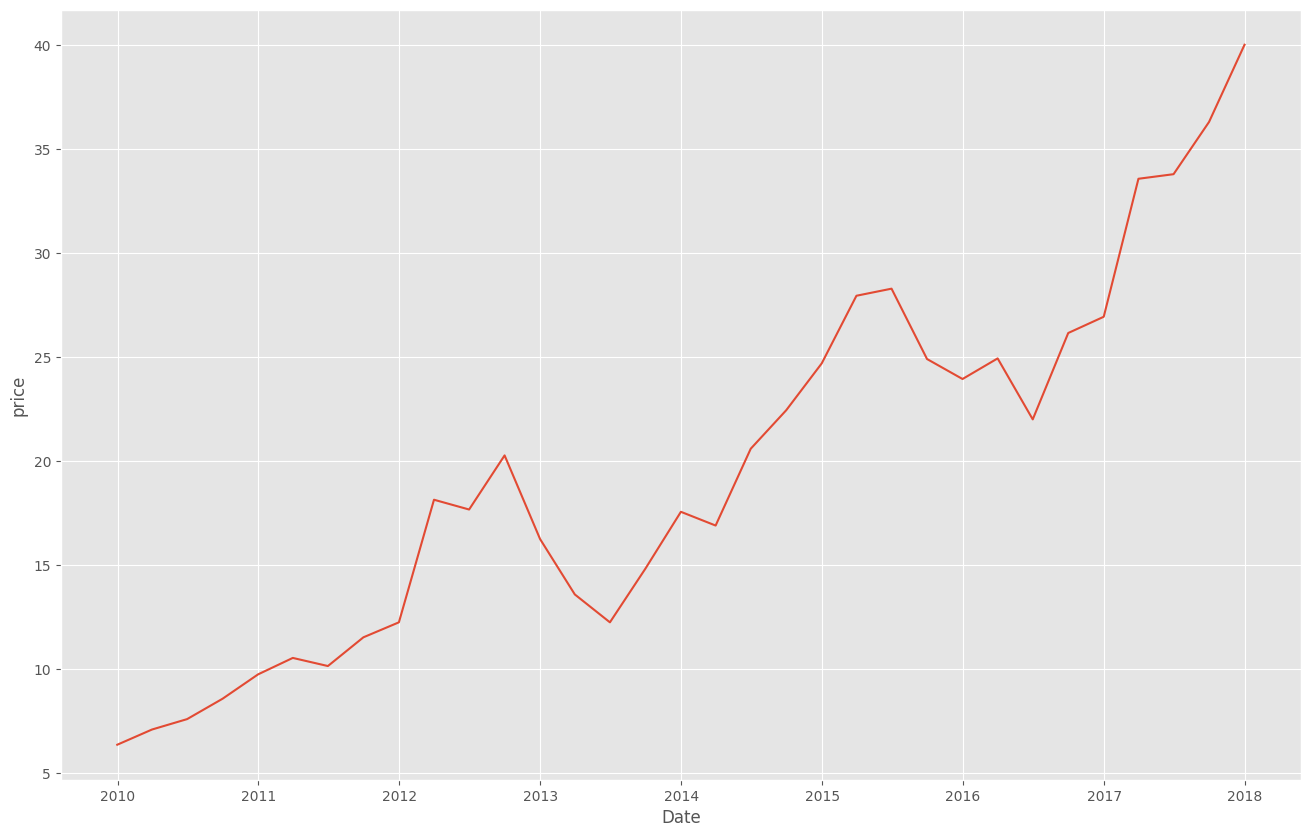

In [204]:
plt.style.use(style='ggplot')
plt.figure(figsize=(16,10))
plt.plot(aapl_train["Stock Price"])
plt.xlabel("Date")
plt.ylabel("price")
plt.show()

In [205]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
aapl_train['Stock Price'] = scaler.fit_transform(aapl_train['Stock Price'].values, axis=1)

AttributeError: module 'numpy.linalg._umath_linalg' has no attribute '_ilp64'

In [206]:
aapl_model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])

aapl_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam())

aapl_model.fit(aapl_features,aapl_labels,epochs=10)



Epoch 1/10
2/2 [==============================] - 0s 6ms/step - loss: 461.3534
Epoch 2/10
2/2 [==============================] - 0s 4ms/step - loss: 459.3045
Epoch 3/10
2/2 [==============================] - 0s 4ms/step - loss: 457.2965
Epoch 4/10
2/2 [==============================] - 0s 5ms/step - loss: 455.3431
Epoch 5/10
2/2 [==============================] - 0s 2ms/step - loss: 453.4378
Epoch 6/10
2/2 [==============================] - 0s 2ms/step - loss: 451.5523
Epoch 7/10
2/2 [==============================] - 0s 2ms/step - loss: 449.6221
Epoch 8/10
2/2 [==============================] - 0s 2ms/step - loss: 447.7045
Epoch 9/10
2/2 [==============================] - 0s 2ms/step - loss: 445.7473
Epoch 10/10
2/2 [==============================] - 0s 2ms/step - loss: 443.8517


C:\Users\xlor1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\generic_utils.py:444: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return [None if x is None else x[start] for x in arrays]


In [207]:
normalize = layers.Normalization()
normalize.adapt(aapl_features)

norm_aapl_model = tf.keras.Sequential([
  normalize,
  layers.Dense(64),
  layers.Dense(1)
])

norm_aapl_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam())

norm_aapl_model.fit(aapl_features,aapl_labels,epochs=10)

norm_aapl_model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/10
2/2 [==============================] - 0s 5ms/step - loss: 462.8849
Epoch 2/10
2/2 [==============================] - 0s 4ms/step - loss: 461.2438
Epoch 3/10
2/2 [==============================] - 0s 5ms/step - loss: 459.7629
Epoch 4/10
2/2 [==============================] - 0s 4ms/step - loss: 458.4842
Epoch 5/10
2/2 [==============================] - 0s 2ms/step - loss: 457.1956
Epoch 6/10
2/2 [==============================] - 0s 2ms/step - loss: 456.0235
Epoch 7/10
2/2 [==============================] - 0s 2ms/step - loss: 454.8565
Epoch 8/10
2/2 [==============================] - 0s 2ms/step - loss: 453.7008
Epoch 9/10
2/2 [==============================] - 0s 1ms/step - loss: 452.4184
Epoch 10/10
2/2 [==============================] - 0s 1ms/step - loss: 451.1675


ValueError: in user code:

    File "C:\Users\xlor1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py", line 1972, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\xlor1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py", line 1956, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\xlor1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py", line 1944, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\xlor1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py", line 1850, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\xlor1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer 'normalization_5' (type Normalization).
    
    Dimensions must be equal, but are 5 and 4 for '{{node sequential_15/normalization_5/sub}} = Sub[T=DT_FLOAT](IteratorGetNext, sequential_15/normalization_5/sub/y)' with input shapes: [?,5], [1,4].
    
    Call arguments received by layer 'normalization_5' (type Normalization):
      • inputs=tf.Tensor(shape=(None, 5), dtype=float32)
